<a href="https://colab.research.google.com/github/Malak1amigas/AI-mini-projects/blob/main/AI_Project_1_(Markov_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("./data.csv")
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# Statistics for sqft_living column

print(dataset['sqft_living'])
print("Min: ", dataset['sqft_living'].min())
print("Max: ", dataset['sqft_living'].max())
print("Mean: ", dataset['sqft_living'].mean())
print("Median: ", dataset['sqft_living'].median())
print("Mode: ", dataset['sqft_living'].mode())

0       1340
1       3650
2       1930
3       2000
4       1940
        ... 
4595    1510
4596    1460
4597    3010
4598    2090
4599    1490
Name: sqft_living, Length: 4600, dtype: int64
Min:  370
Max:  13540
Mean:  2139.3469565217392
Median:  1980.0
Mode:  0    1720
1    1940
Name: sqft_living, dtype: int64


In [ ]:
# Statistics for city column

print(dataset['city'])
print("Mode: ", dataset['city'].mode())

0       Shoreline
1         Seattle
2            Kent
3        Bellevue
4         Redmond
          ...    
4595      Seattle
4596     Bellevue
4597       Renton
4598      Seattle
4599    Covington
Name: city, Length: 4600, dtype: object
Mode:  0    Seattle
Name: city, dtype: object


In [ ]:
# Statistics for condition column

print("Min: ", dataset['condition'].min())
print("Max: ", dataset['condition'].max())
print("Median: ", dataset['condition'].median())
print("Mode: ", dataset['condition'].mode())

Min:  1
Max:  5
Median:  3.0
Mode:  0    3
Name: condition, dtype: int64


Text(0.5, 1.0, 'Condition Vs Price')

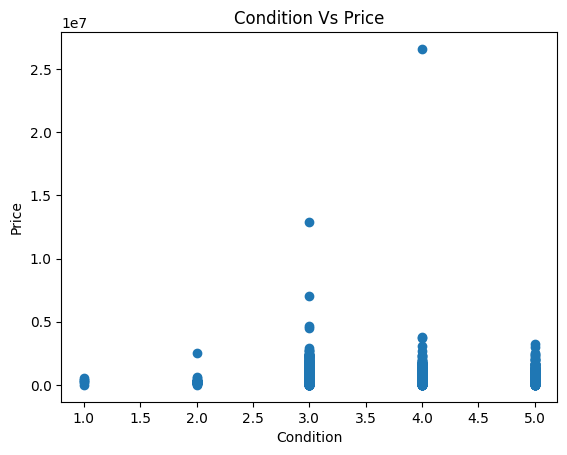

In [ ]:
# Correlation of condition and price

# CATPLOT

plt.scatter(dataset['condition'],dataset['price'])
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Condition Vs Price')

<BarContainer object of 44 artists>

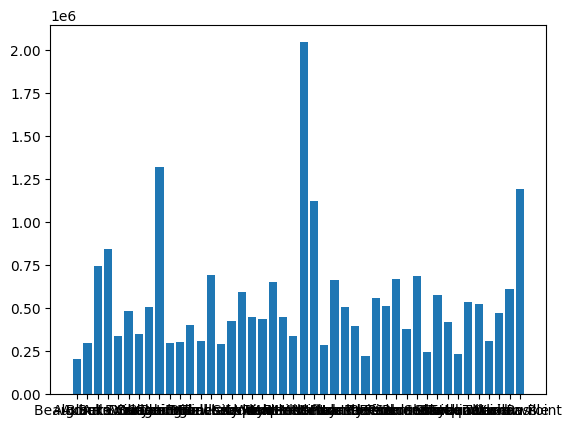

In [ ]:
# Correlation of price with city
mean_prices = dataset.groupby("city")["price"].mean().reset_index()
plt.bar(mean_prices['city'],mean_prices['price'])

Text(0.5, 1.0, 'sqft_living Vs Price')

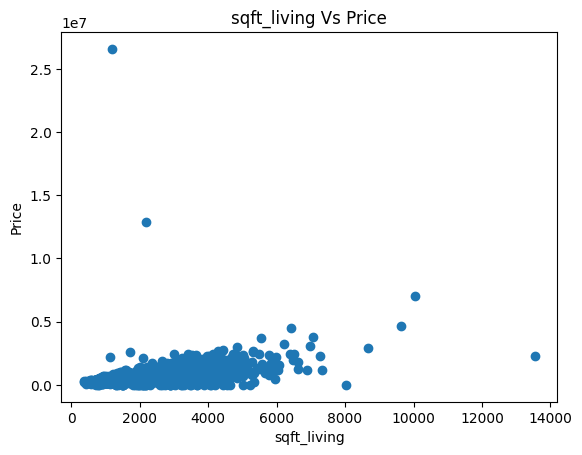

In [ ]:
# Correlation of price with sqft_living

plt.scatter(dataset['sqft_living'],dataset['price'])
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('sqft_living Vs Price')

Text(0.5, 1.0, 'sqft_living Vs Price')

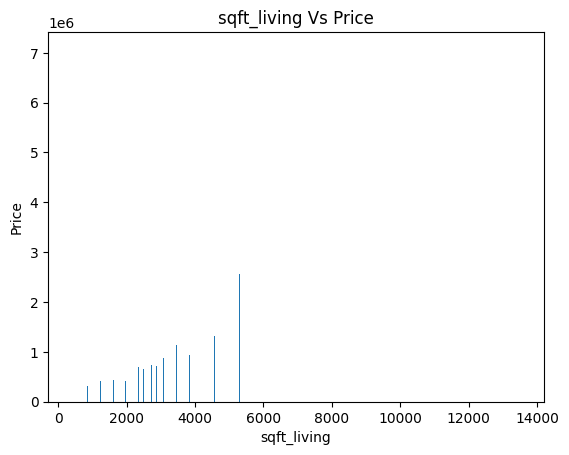

In [ ]:
# Correlation of sqft_living with mean price

mean_prices = dataset.groupby("sqft_living")["price"].mean().reset_index()
plt.bar(mean_prices['sqft_living'],mean_prices['price'])
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('sqft_living Vs Price')

In [ ]:
# Correlation matrix for all attributes
corr=dataset.corr(method='pearson')
corr

<ipython-input-13-8619f1bc3992>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr(method='pearson')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


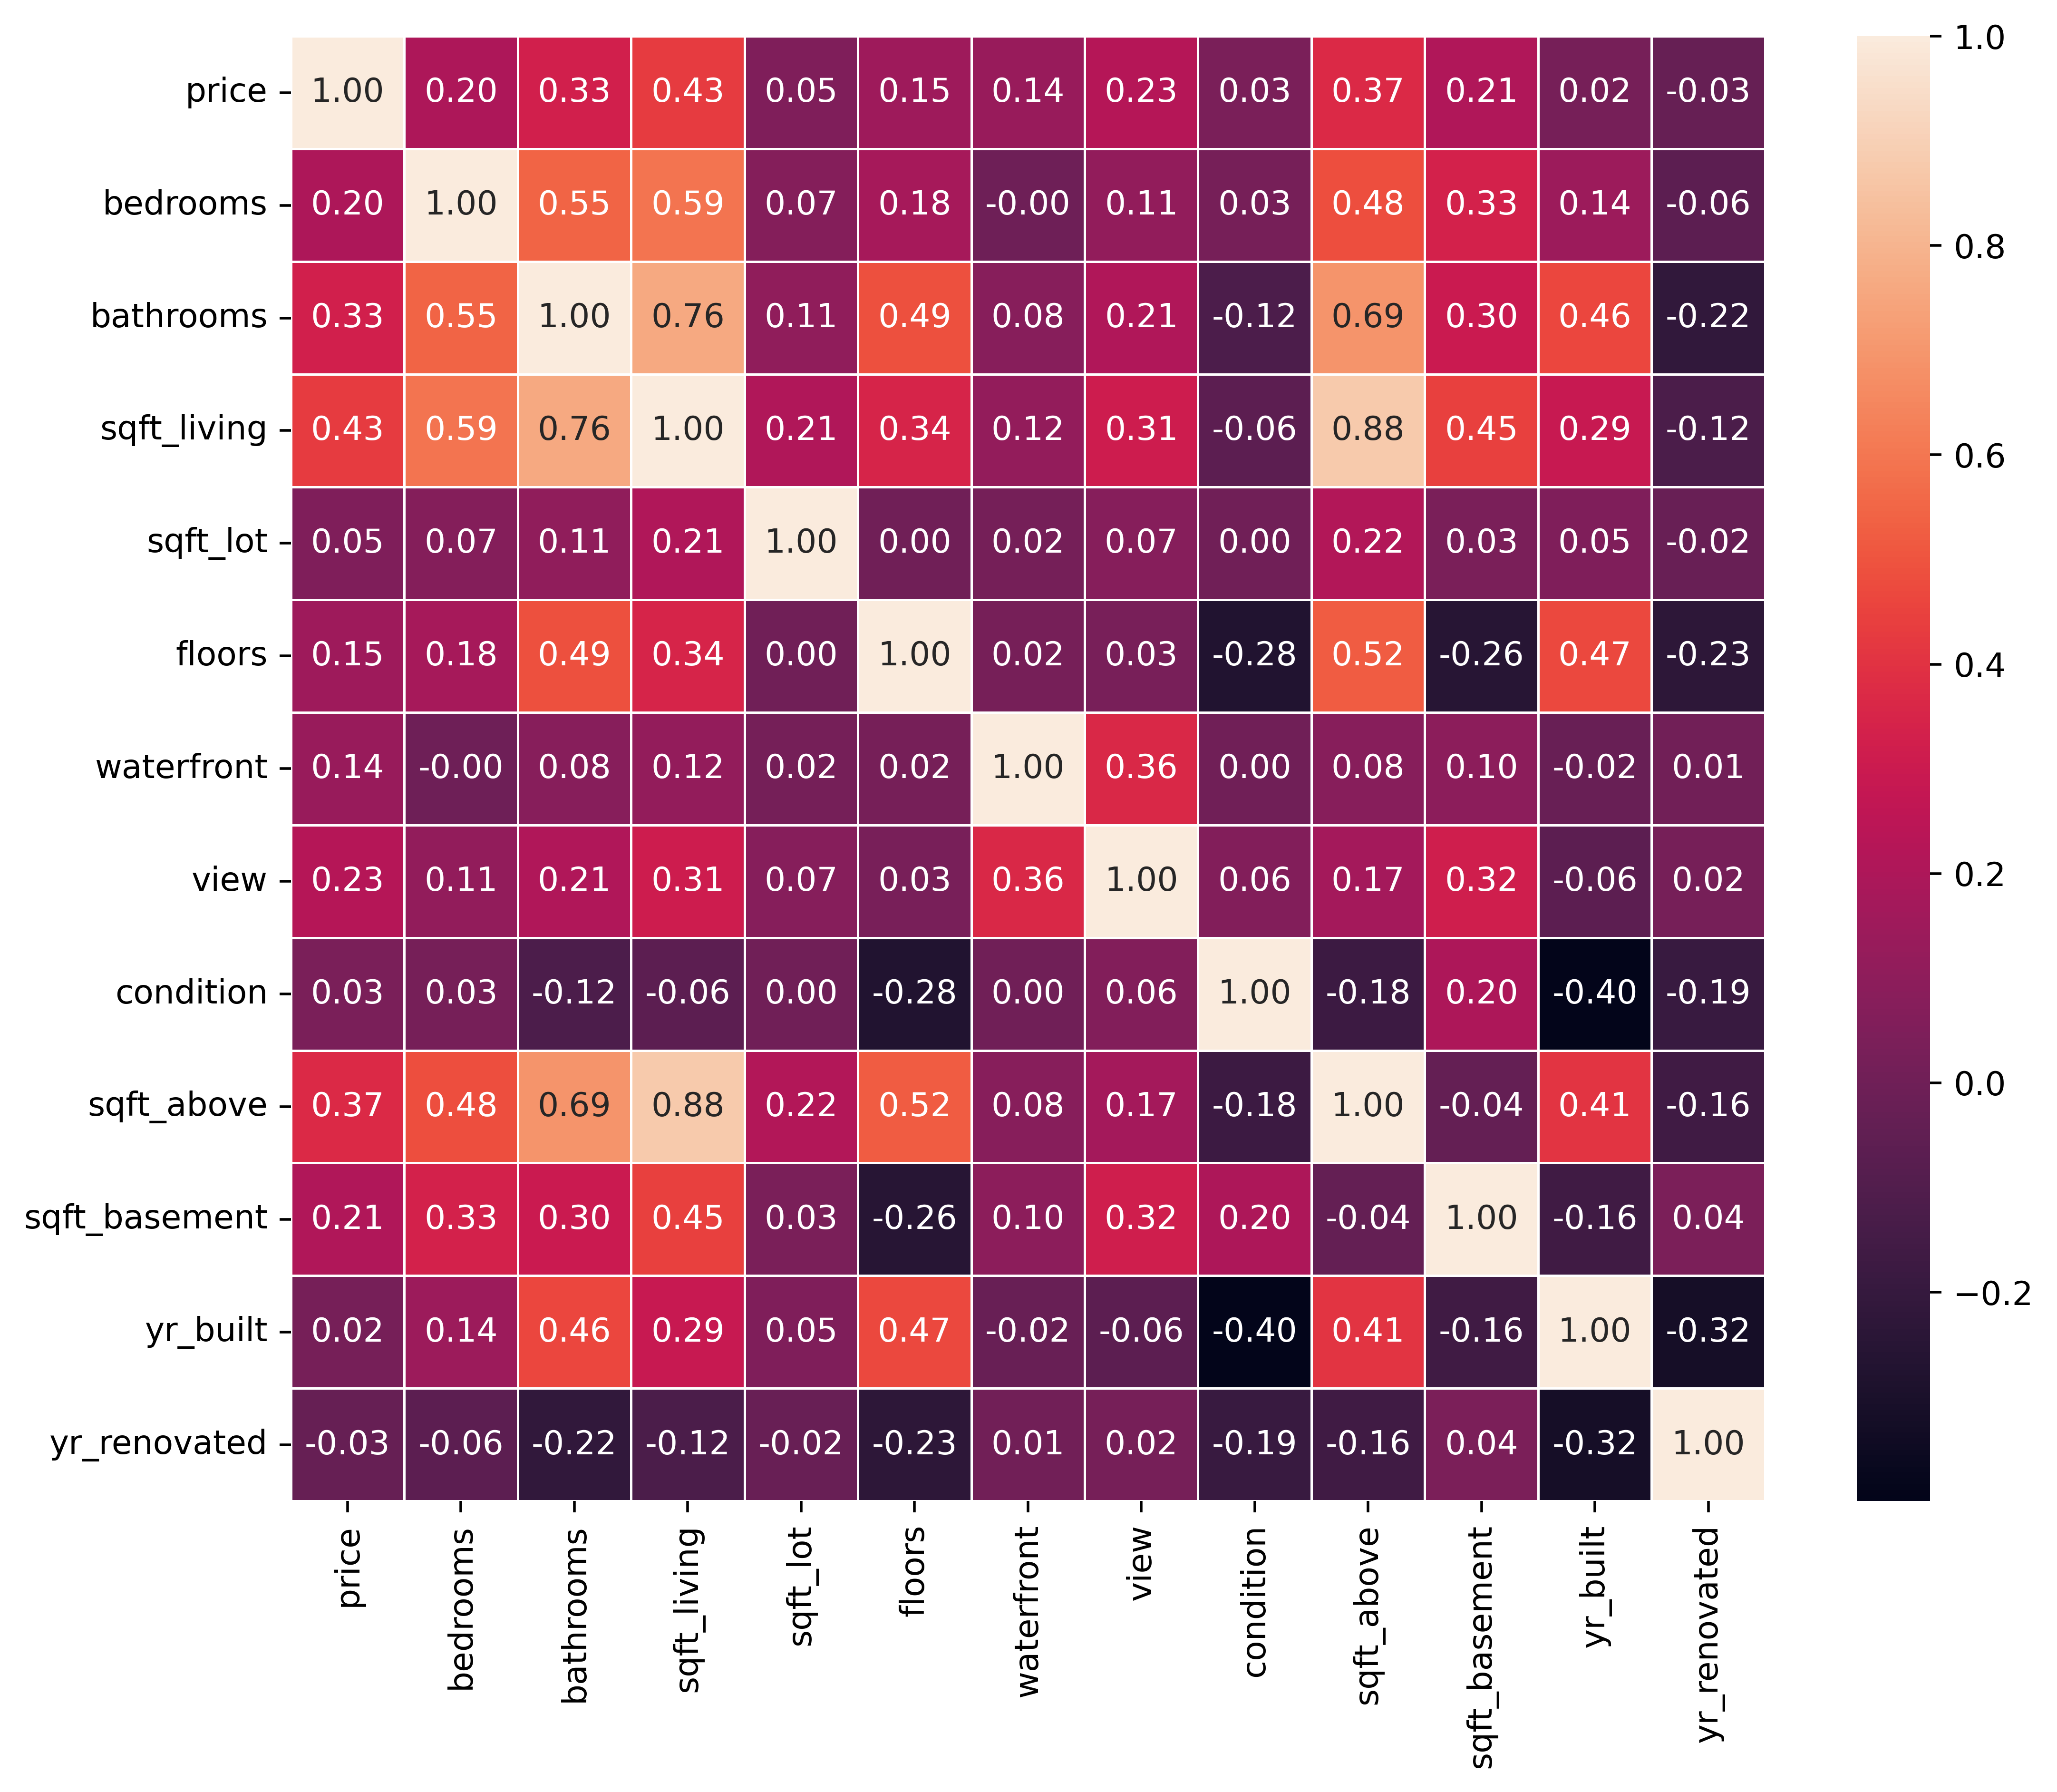

In [ ]:
# Heatmap of all correlations
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [ ]:
# computing the quartiles to divide the price into four ranges

q1 = np.percentile( dataset['price'], 25)
q2 = np.percentile( dataset['price'], 50)
q3 = np.percentile( dataset['price'], 75)

In [ ]:
# dividing the price into four ranges

dataset['price_range']=''
dataset['price_range'] = dataset['price'].apply(lambda x: '1' if x < q1 else ('2' if q1 <= x <= q2 else ('3') if q2 <= x <= q3 else '4'))

In [ ]:
# Markov Model for Condition and Price Ranges

subset_with_condition = dataset[['condition','price_range']]



markov_model_1 = {}
for i in range(len(subset_with_condition['condition'])):
   curr_state = subset_with_condition['condition'][i]
   next_state = subset_with_condition['price_range'][i]
   if curr_state not in markov_model_1:
      markov_model_1[curr_state] = {}
      markov_model_1[curr_state][next_state] = 1
   else:
    if next_state in markov_model_1[curr_state]:
      markov_model_1[curr_state][next_state] += 1
    else:
      markov_model_1[curr_state][next_state] = 1



for curr_state, transition in markov_model_1.items():
    total = sum(transition.values())
    for state, count in transition.items():
      markov_model_1[curr_state][state] = count/total

markov_model_1

{3: {'1': 0.2306086956521739,
  '3': 0.2539130434782609,
  '2': 0.2657391304347826,
  '4': 0.2497391304347826},
 5: {'4': 0.3632183908045977,
  '2': 0.1793103448275862,
  '3': 0.26436781609195403,
  '1': 0.19310344827586207},
 4: {'2': 0.24041533546325877,
  '3': 0.24121405750798722,
  '1': 0.3003194888178914,
  '4': 0.21805111821086262},
 2: {'1': 0.75, '2': 0.15625, '4': 0.03125, '3': 0.0625},
 1: {'1': 0.5, '3': 0.16666666666666666, '2': 0.3333333333333333}}

In [ ]:
# Markov Model for Sqft_Living and Price Ranges

subset_with_sqft_living = dataset[['sqft_living','price_range']]

markov_model_2 = {}
for i in range(len(subset_with_sqft_living['sqft_living'])):
   curr_state = subset_with_sqft_living['sqft_living'][i]
   next_state = subset_with_sqft_living['price_range'][i]
   if curr_state not in markov_model_2:
      markov_model_2[curr_state] = {}
      markov_model_2[curr_state][next_state] = 1
   else:
    if next_state in markov_model_2[curr_state]:
      markov_model_2[curr_state][next_state] += 1
    else:
      markov_model_2[curr_state][next_state] = 1



for curr_state, transition in markov_model_2.items():
    total = sum(transition.values())
    for state, count in transition.items():
      markov_model_2[curr_state][state] = count/total

markov_model_2

{1340: {'1': 0.5625, '3': 0.1875, '2': 0.25},
 3650: {'4': 1.0},
 1930: {'2': 0.3157894736842105,
  '1': 0.42105263157894735,
  '3': 0.2631578947368421},
 2000: {'2': 0.3333333333333333,
  '3': 0.23333333333333334,
  '1': 0.3,
  '4': 0.13333333333333333},
 1940: {'3': 0.34375, '1': 0.28125, '2': 0.25, '4': 0.125},
 880: {'3': 0.09090909090909091,
  '1': 0.6363636363636364,
  '2': 0.2727272727272727},
 1350: {'2': 0.42105263157894735,
  '1': 0.3684210526315789,
  '3': 0.21052631578947367},
 2710: {'3': 0.5, '4': 0.3, '2': 0.2},
 2430: {'2': 0.18181818181818182,
  '3': 0.36363636363636365,
  '4': 0.3181818181818182,
  '1': 0.13636363636363635},
 1520: {'3': 0.23809523809523808,
  '2': 0.3333333333333333,
  '1': 0.38095238095238093,
  '4': 0.047619047619047616},
 1710: {'3': 0.6,
  '2': 0.26666666666666666,
  '1': 0.06666666666666667,
  '4': 0.06666666666666667},
 2920: {'4': 0.6875, '3': 0.3125},
 2330: {'3': 0.3888888888888889,
  '4': 0.3333333333333333,
  '2': 0.2222222222222222,
  '1'

In [ ]:
# Encoding city names into codes for easier model building

dataset_groupedby_city = dataset.groupby(['city']).count().reset_index()
dataset_groupedby_city['price_range'] = dataset['price_range']
subset_with_city = dataset_groupedby_city[['city','price_range']]
subset_with_city['city_code'] = ''
for i in range (len(subset_with_city)):
  subset_with_city['city_code'][i]=i+1

subset_with_city = subset_with_city[['city_code','price_range']]
subset_with_city

<ipython-input-19-5138e67c53d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_with_city['city_code'] = ''
<ipython-input-19-5138e67c53d6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_with_city['city_code'][i]=i+1


,city_code,price_range
0,1,1
1,2,4
2,3,2
3,4,2
4,5,3
5,6,3
6,7,2
7,8,3
8,9,2
9,10,3


In [ ]:
# Markov Model for City and Price Ranges
# City names were replaced with city codes to facilitate building the Markov Model

markov_model_3 = {}
for i in range(len(subset_with_city['city_code'])):
   curr_state = subset_with_city['city_code'][i]
   next_state = subset_with_city['price_range'][i]
   if curr_state not in markov_model_3:
      markov_model_3[curr_state] = {}
      markov_model_3[curr_state][next_state] = 1
   else:
    if next_state in markov_model_3[curr_state]:
      markov_model_3[curr_state][next_state] += 1
    else:
      markov_model_3[curr_state][next_state] = 1



for curr_state, transition in markov_model_3.items():
    total = sum(transition.values())
    for state, count in transition.items():
      markov_model_3[curr_state][state] = count/total

markov_model_3

{1: {'1': 1.0},
 2: {'4': 1.0},
 3: {'2': 1.0},
 4: {'2': 1.0},
 5: {'3': 1.0},
 6: {'3': 1.0},
 7: {'2': 1.0},
 8: {'3': 1.0},
 9: {'2': 1.0},
 10: {'3': 1.0},
 11: {'3': 1.0},
 12: {'4': 1.0},
 13: {'3': 1.0},
 14: {'2': 1.0},
 15: {'4': 1.0},
 16: {'1': 1.0},
 17: {'2': 1.0},
 18: {'2': 1.0},
 19: {'1': 1.0},
 20: {'1': 1.0},
 21: {'4': 1.0},
 22: {'2': 1.0},
 23: {'3': 1.0},
 24: {'3': 1.0},
 25: {'3': 1.0},
 26: {'1': 1.0},
 27: {'3': 1.0},
 28: {'4': 1.0},
 29: {'4': 1.0},
 30: {'4': 1.0},
 31: {'2': 1.0},
 32: {'3': 1.0},
 33: {'3': 1.0},
 34: {'3': 1.0},
 35: {'2': 1.0},
 36: {'3': 1.0},
 37: {'2': 1.0},
 38: {'1': 1.0},
 39: {'2': 1.0},
 40: {'4': 1.0},
 41: {'2': 1.0},
 42: {'1': 1.0},
 43: {'1': 1.0},
 44: {'2': 1.0}}